<a href="https://colab.research.google.com/github/Arkasom/Machine_Learning_Works/blob/main/TASK_3_Level_1_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK-3(Level-1(Basic))

# Description: Build a KNN classifier to classify data points into categories.

# Objectives

* Train a KNN model on a labeled dataset.
* Evaluate the performance using accuracy, confusion matrix, and precision/recall.
* Use different values of K and compare the results.
* Tools: Python, scikit-learn, pandas.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('iris.csv')
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
x = df.drop('species',axis=1)
Y = df['species']
print(x.head())
print(Y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


## Encoding the categorical target column

In [ ]:
le = LabelEncoder()
Y = le.fit_transform(Y)
# Convert the NumPy array back to a pandas Series with a name
Y = pd.Series(Y, name='species_encoded')
print(Y.head())

0    0
1    0
2    0
3    0
4    0
Name: species_encoded, dtype: int64


## Standarize the numerical columns

In [ ]:
se = StandardScaler()
x = se.fit_transform(x)
# Convert the NumPy array back to a pandas DataFrame with original column names
x = pd.DataFrame(x, columns=df.columns[:-1]) # Exclude the 'species' column name
print(x.head())

   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.032057     -1.341272    -1.312977
1     -1.143017    -0.124958     -1.341272    -1.312977
2     -1.385353     0.337848     -1.398138    -1.312977
3     -1.506521     0.106445     -1.284407    -1.312977
4     -1.021849     1.263460     -1.341272    -1.312977


In [ ]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Split the dataset into training and testing sets

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(x,Y,test_size=0.2,random_state=42,stratify=Y)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Train the model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1) #At first we will start with K = 1
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
pred = knn.predict(X_test)

## Evaluate the Model

In [ ]:
print(confusion_matrix(Y_test,pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


In [ ]:
print(classification_report(Y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
print(accuracy_score(Y_test,pred))

0.9666666666666667


## Choosing K value using Elbow method

In [ ]:
error_rate = []
k_range = range(1,15)
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,Y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Error Rate')

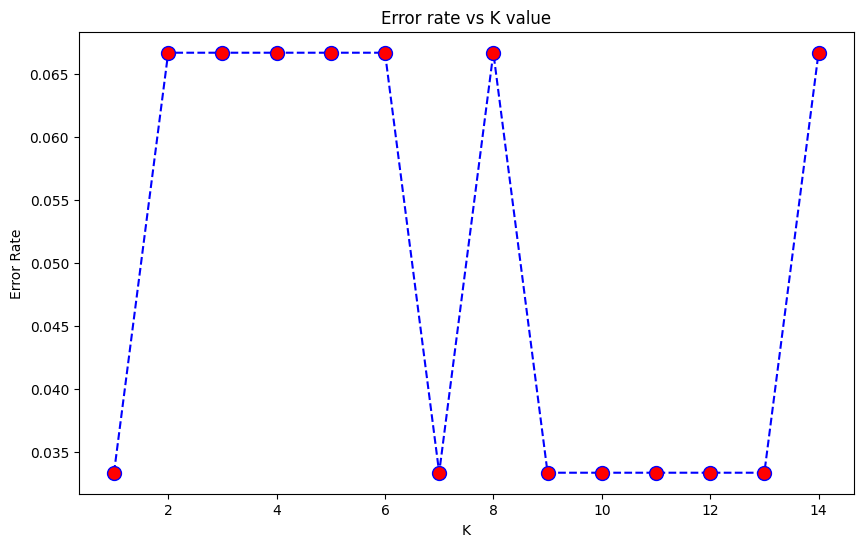

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(k_range,error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title("Error rate vs K value")
plt.xlabel("K")
plt.ylabel("Error Rate")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7) #now we choose the k value 7
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test,pred))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

0.9666666666666667


## Using Cross validation Method

In [ ]:
from sklearn.model_selection import cross_val_score

## Find optimal K using cross-validation


In [ ]:
mean_cv_scores = []
k_range = range(1, 15)  # Let's test K from 1 to 20

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train, Y_train, cv=5) # Using 5-fold cross-validation
    mean_cv_scores.append(np.mean(cv_scores))

print("Mean cross-validation scores for each K:", mean_cv_scores)

Mean cross-validation scores for each K: [np.float64(0.9416666666666668), np.float64(0.9583333333333333), np.float64(0.9583333333333333), np.float64(0.9583333333333333), np.float64(0.9583333333333333), np.float64(0.9666666666666668), np.float64(0.95), np.float64(0.9583333333333333), np.float64(0.9583333333333334), np.float64(0.9666666666666668), np.float64(0.95), np.float64(0.9666666666666668), np.float64(0.95), np.float64(0.9583333333333334)]


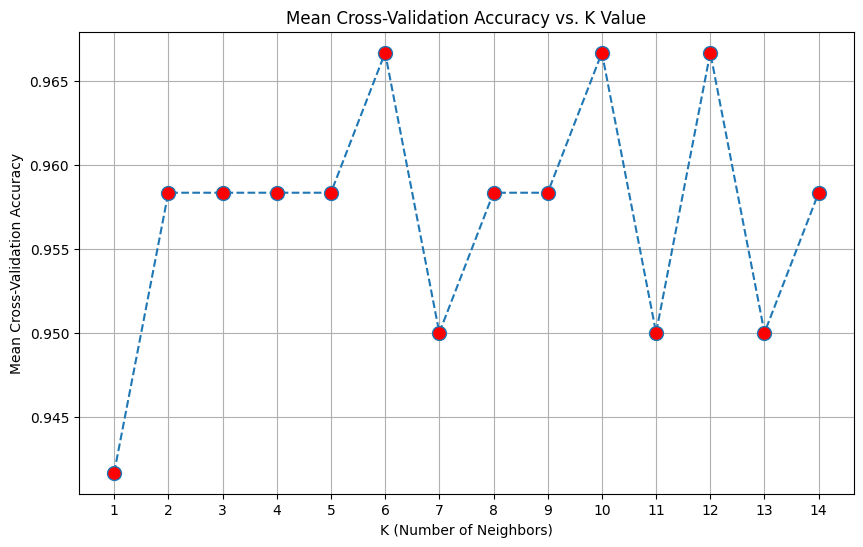

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, mean_cv_scores, marker='o', linestyle='dashed',markerfacecolor='red',markersize=10)
plt.title('Mean Cross-Validation Accuracy vs. K Value')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
optimal_k_index = np.argmax(mean_cv_scores)
optimal_k = k_range[optimal_k_index]
print(f"The optimal K value based on cross-validation is: {optimal_k}")
print(f"The corresponding mean cross-validation accuracy is: {mean_cv_scores[optimal_k_index]:.4f}")

The optimal K value based on cross-validation is: 6
The corresponding mean cross-validation accuracy is: 0.9667
